In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.signal as signal


In [2]:
# Data is in ./data folder in this convention for the filename
# <session_number>_<shoes_name>_<coating>.csv
# e.g. 001_newbalance_bitume.csv
# Now we can load the data with pandas
# We can use the read_csv function
def get_files():
    files = os.listdir('./data')
    return files

def parse_filename(filename):
    filename = filename.replace('.csv', '')
    session, shoes, coating = filename.split('_')
    return session, shoes, coating;

def load_data(filename):
    df = pd.read_csv('./data/' + filename)
    return df

channel_offsets = {
    'Channel 1': 36.98,
    'Channel 2': 196.34,
    'Channel 3': 69.57,
    'Channel 4': -107.74,
}

def get_all_data():
    files = get_files()
    data = []
    for file in files:
        if not file.endswith('.csv'):
            continue
        session, shoes, coating = parse_filename(file)
        df = load_data(file)
        # Change the time column from an interval to actual time, we use the cumsum function
        df['Time'] = np.cumsum(df['Time'])
        # Now find the minimum value of each channel and substract it to the channel
        for channel in ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']:
            df[channel] = df[channel] - channel_offsets[channel]


        data.append((session, shoes, coating, df))
    # Order the data by shoes and coating
    data = sorted(data, key=lambda x: (x[1], x[2]))
    
    return data

datas = get_all_data()
len (datas)

6

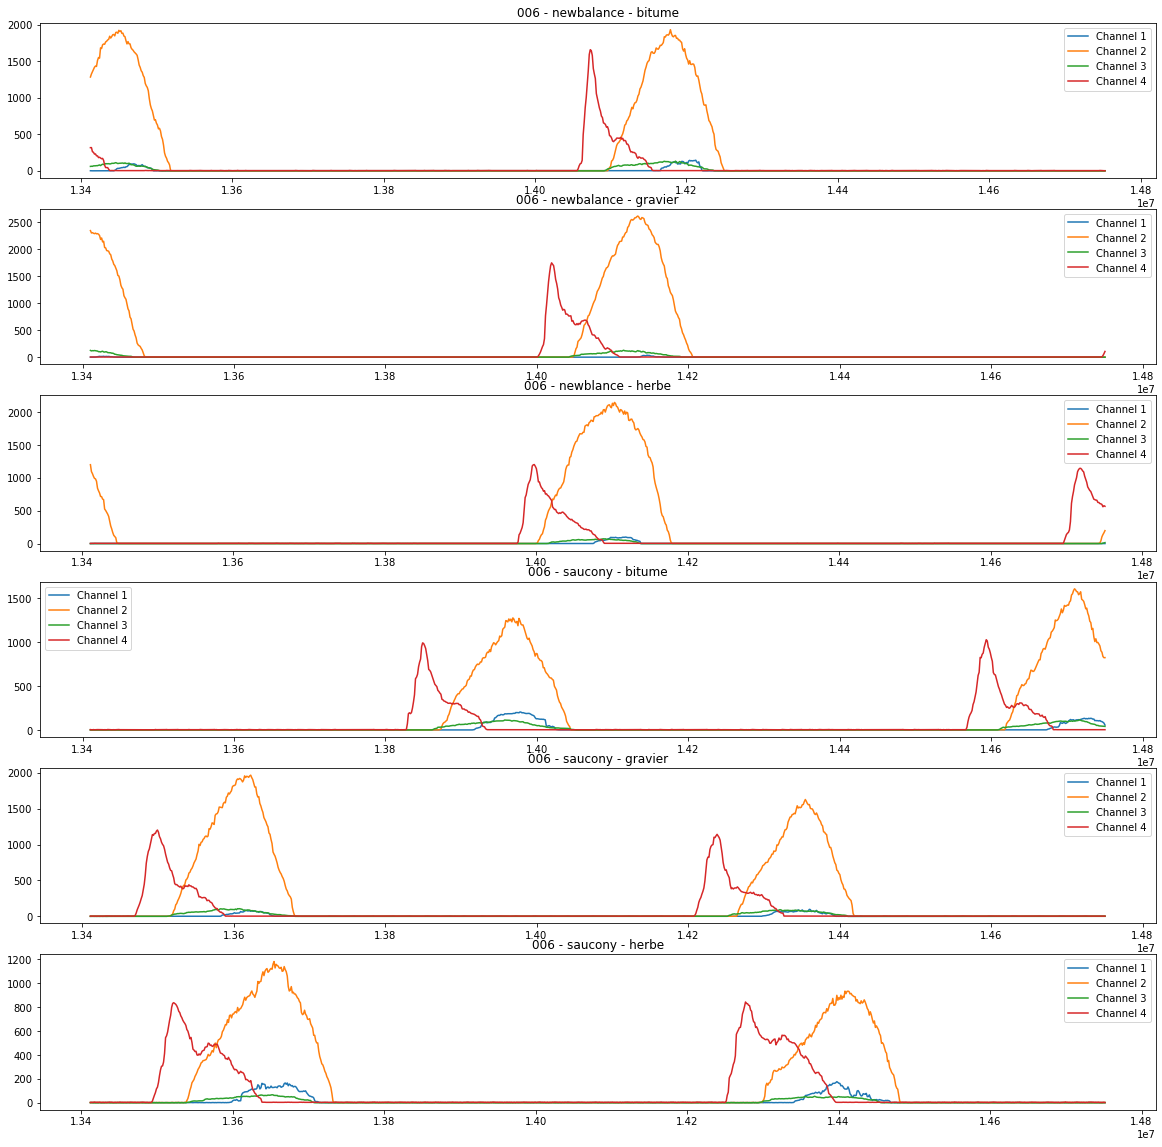

In [3]:
def plot_data(data):
    # Plot in subplots for each entry
    fig, axs = plt.subplots(len(data), 1, figsize=(20, 20))
    for i, (session, shoes, coating, df) in enumerate(data):
        for channel in ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']:
            df_trim = df[10000:11000]
            axs[i].plot(df_trim['Time'], df_trim[channel], label=channel)
        axs[i].set_title(f'{session} - {shoes} - {coating}')
        axs[i].legend()

plot_data(datas)

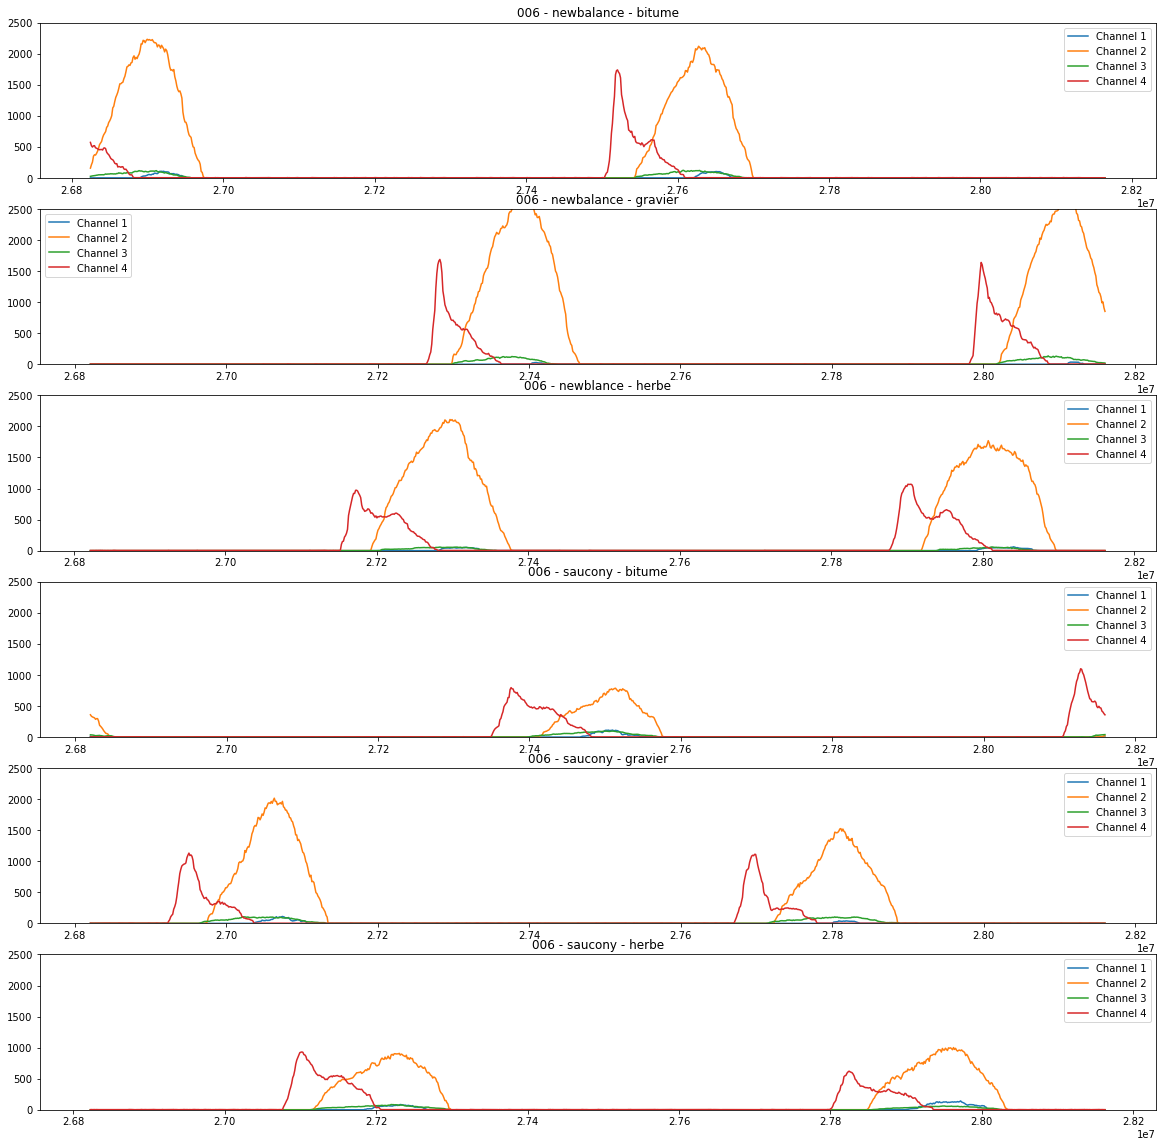

In [4]:
# Plot the data with the same scale
def plot_data_same_scale(data):
    fig, axs = plt.subplots(len(data), 1, figsize=(20, 20))
    for i, (session, shoes, coating, df) in enumerate(data):
        for channel in ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']:
            df_trim = df[20000:21000]
            axs[i].plot(df_trim['Time'], df_trim[channel], label=channel)
        axs[i].set_title(f'{session} - {shoes} - {coating}')
        axs[i].legend()
        axs[i].set_ylim([0, 2500])

plot_data_same_scale(datas)


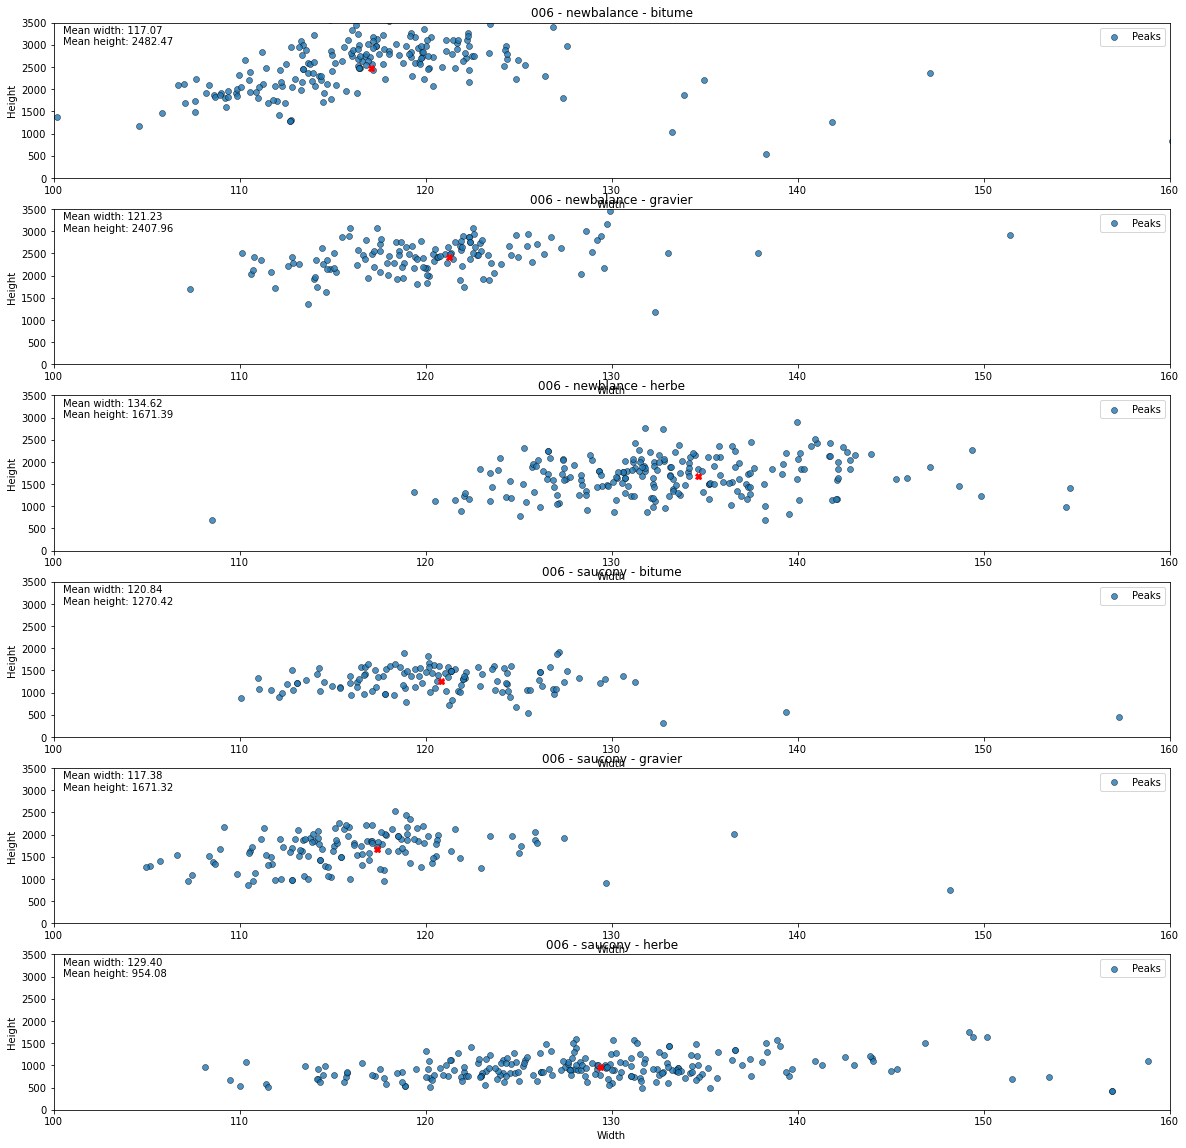

In [5]:
# Dow the same for other samples
def plot_data(data, channel):
    channel = 'Channel ' + str(channel);
    # Plot in subplots for each entry
    fig, axs = plt.subplots(len(data), 1 , figsize=(20, 20))
    for i, (session, shoes, coating, df) in enumerate(data):
        df_trim = df[0:-1000]
        peaks, _ = signal.find_peaks(df_trim[channel], height=300, prominence=150, width=50)

        widths = signal.peak_widths(df_trim[channel], peaks, rel_height=0.97)
        mean_width = np.mean(widths[0])
        mean_height = np.mean(df_trim[channel][peaks])

        axs[i].scatter(widths[0],df_trim[channel][peaks], label='Peaks', alpha=0.8, linewidths=0.5, edgecolors='black')
        axs[i].plot(mean_width ,mean_height, 'Xr')
        axs[i].set_title(f'{session} - {shoes} - {coating}')
        axs[i].set_xlabel('Width')
        axs[i].set_ylabel('Height')
        axs[i].set_xlim([100, 160])
        axs[i].set_ylim([0, 3500])
        # Display the mean width and height
        axs[i].text(100.5, 3000, f'Mean width: {mean_width:.2f} \nMean height: {mean_height:.2f}')

        axs[i].legend()
    plt.show()

plot_data(datas,2)

In [15]:
def get_peaks(data, channel, window=300):
    channel = 'Channel ' + str(channel);

    peaks_res = [[]] * len(data)

    for i, (session, shoes, coating, df) in enumerate(data):
        df_trim = df[1000:-1000]
        peaks, _ = signal.find_peaks(df_trim[channel], height=300, prominence=150, width=50)
        for j in range(len(peaks)):
            peak = peaks[j]
            sig_peak = df_trim[channel][peak-window:peak+window]
            print(peak)
            if len(sig_peak) == window*2:
                peaks_res[i].append(df_trim[channel][peak-window:peak+window])
    return peaks_res

window = 100
peaks_extracted = [get_peaks(datas, channel, window) for channel in range(1,5)]


18410
54170
14816
48715
49306
49879
50465
51039
51617
51619
58490
66433
67001
67551
68126
69255
69831
70372
70950
71506
73205
73768
74328
74891
75461
75463
75465
76600
78284
78860
79399
79974
82849
83413
83997
84567
85134
85698
86268
86821
87389
88538
89107
89661
90217
90807
93597
94197
98742
99304
99883
101027
108377
108954
116323
116903
117471
121458
122010
123226
123792
583
1106
1630
2167
2688
3211
3753
4282
4803
5323
5863
6392
6922
7449
7979
8510
9028
9571
10109
10634
11153
11689
12214
12737
13273
13799
14322
14852
15382
15897
16426
16943
17469
17988
18527
19056
19599
20142
20706
21235
21770
22302
22836
23375
23909
24426
24974
24980
25523
26049
26575
27108
27622
28145
28670
29196
29730
30257
30790
31307
31310
31848
32379
32900
33425
33957
34482
35006
35530
36054
36581
37113
37633
38149
38670
39193
39719
40232
40770
41279
41807
42325
42851
43378
43905
44430
44958
45490
46029
46542
47066
47595
48136
48664
49188
49712
50235
50761
51293
51821
52349
52880
53414
53934
54467
54990
55518
5

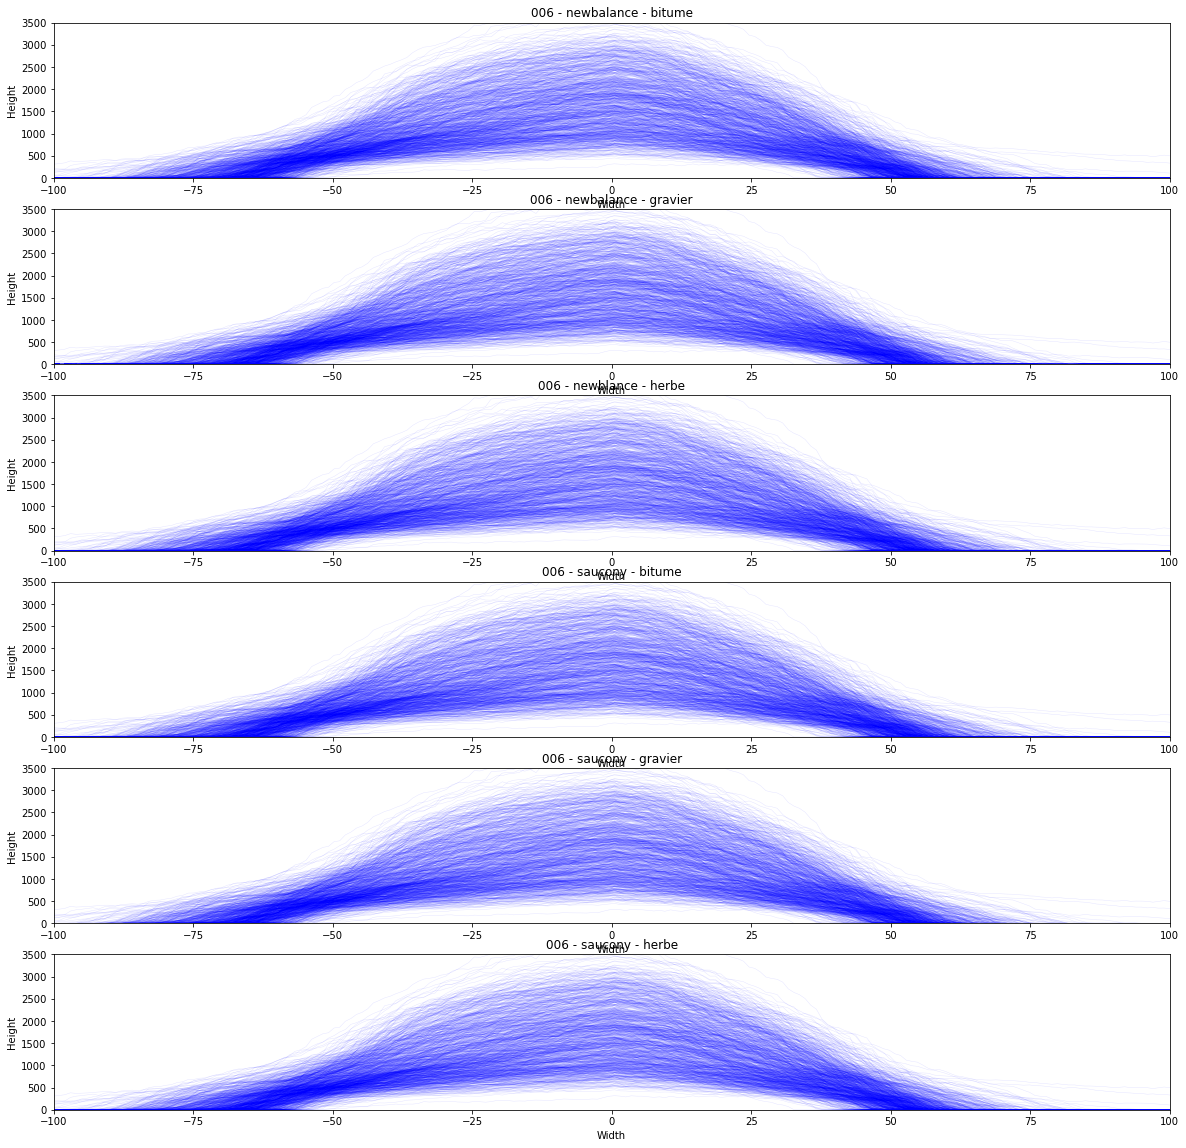

In [11]:

def get_mean_peak(channel):
    peaks = peaks_extracted[channel-1]
    mean_peaks = []
    for peak in range(len(peaks)):
        mean_peaks.append(np.mean(peaks[peak], axis=0))

# Plot average peak
def plot_peaks(data, channel):
    peaks = peaks_extracted[channel-1]
    channel = 'Channel ' + str(channel);
    # Plot in subplots for each entry
    fig, axs = plt.subplots(len(data), 1 , figsize=(20, 20))
    for i, (session, shoes, coating, df) in enumerate(data):
        for j in range(1000):
            axs[i].plot(np.linspace(-window, window, 2*window),peaks[i][j], label='Peaks', alpha=0.1, color='blue', linewidth=0.5)

        axs[i].set_title(f'{session} - {shoes} - {coating}')
        axs[i].set_xlabel('Width')
        axs[i].set_ylabel('Height')
        axs[i].set_xlim([-window, window])
        axs[i].set_ylim([0, 3500])


        
    plt.show()

plot_peaks(datas,2)

In [8]:
def save_peak(peak):
    pd.DataFrame(peak).to_csv('motif.csv', index=False)

save_peak(peaks_extracted[1][0][0])